# Começo

## primeira: Crie um gráfico de linha mostrando a tendência de vendas ao longo do tempo, analisando os dados mensalmente. 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

print("Bibliotecas importadas com sucesso.")


Bibliotecas importadas com sucesso.


In [4]:
df = pd.read_csv('./Dataframes/data_clean.csv', sep=',', encoding='utf-8')

print("Dataframe carregado com sucesso :")

df.head()

Dataframe carregado com sucesso :


,id,data,produto,categoria,quantidade,pagamento,preco_unitario,total_vendas
0,1,2023-07-09,Parafusadeira,Ferramentas,450,Pix,429.0,193050.0
1,2,2023-11-22,Serrote,Ferramentas,266,Débito,64.9,17263.4
2,3,2023-02-10,Regador (10L),Jardinagem,184,Débito,39.9,7341.6
3,4,2023-05-27,Cimento (50kg),Construção e Estrutura,491,Pix,39.9,19590.9
4,5,2023-07-23,Chave de Fenda,Ferramentas,315,Transferência Bancária,24.5,7717.5


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              3000 non-null   int64  
 1   data            3000 non-null   object 
 2   produto         3000 non-null   object 
 3   categoria       3000 non-null   object 
 4   quantidade      3000 non-null   int64  
 5   pagamento       3000 non-null   object 
 6   preco_unitario  3000 non-null   float64
 7   total_vendas    3000 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 187.6+ KB


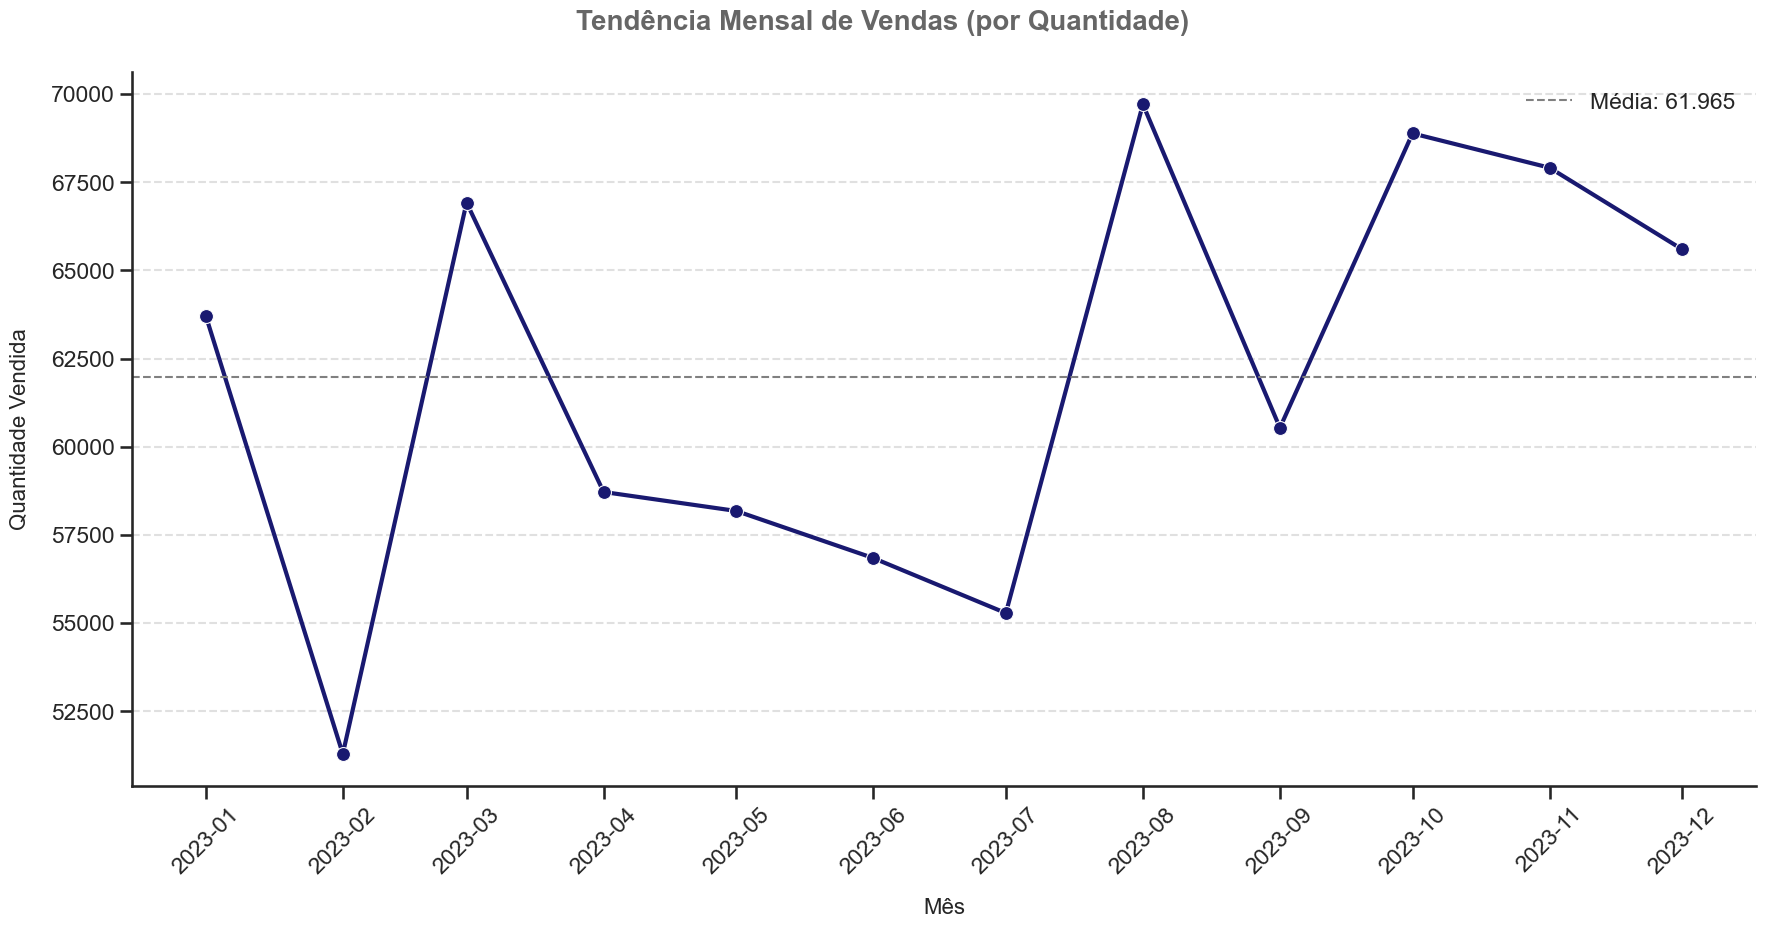

In [6]:
# Gráfico de tendência mensal por quantidade
# Inseri a linha de média para termos uma referência

df['data'] = pd.to_datetime(df['data'])

df["mes"] = df["data"].dt.to_period("M")

vendas_mensais_mes_qtd = (
    df.groupby("mes")["quantidade"]
    .sum()
    .reset_index()
)

vendas_mensais_mes_qtd["mes"] = vendas_mensais_mes_qtd["mes"].dt.to_timestamp()

sns.set_theme(style="ticks", context="talk", palette="pastel")

plt.figure(figsize=(18, 9))
ax =sns.lineplot(
    data=vendas_mensais_mes_qtd,
    x="mes",
    y="quantidade",
    marker="o",
    color="midnightblue",
    markersize=10,
    linewidth=3,
)

media_vendas = vendas_mensais_mes_qtd['quantidade'].mean()
plt.axhline(
    media_vendas,
    color='gray',
    linestyle='--',
    linewidth=1.5,
    label=f'Média: {media_vendas:,.0f}'.replace(',', '.')
)

plt.legend(frameon=False, loc='upper right')
plt.suptitle("Tendência Mensal de Vendas (por Quantidade)", fontsize=20, weight='bold', color='#666666')
plt.xlabel("Mês", fontsize=16, labelpad=15)
plt.ylabel("Quantidade Vendida", fontsize=16, labelpad=15)
sns.despine()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

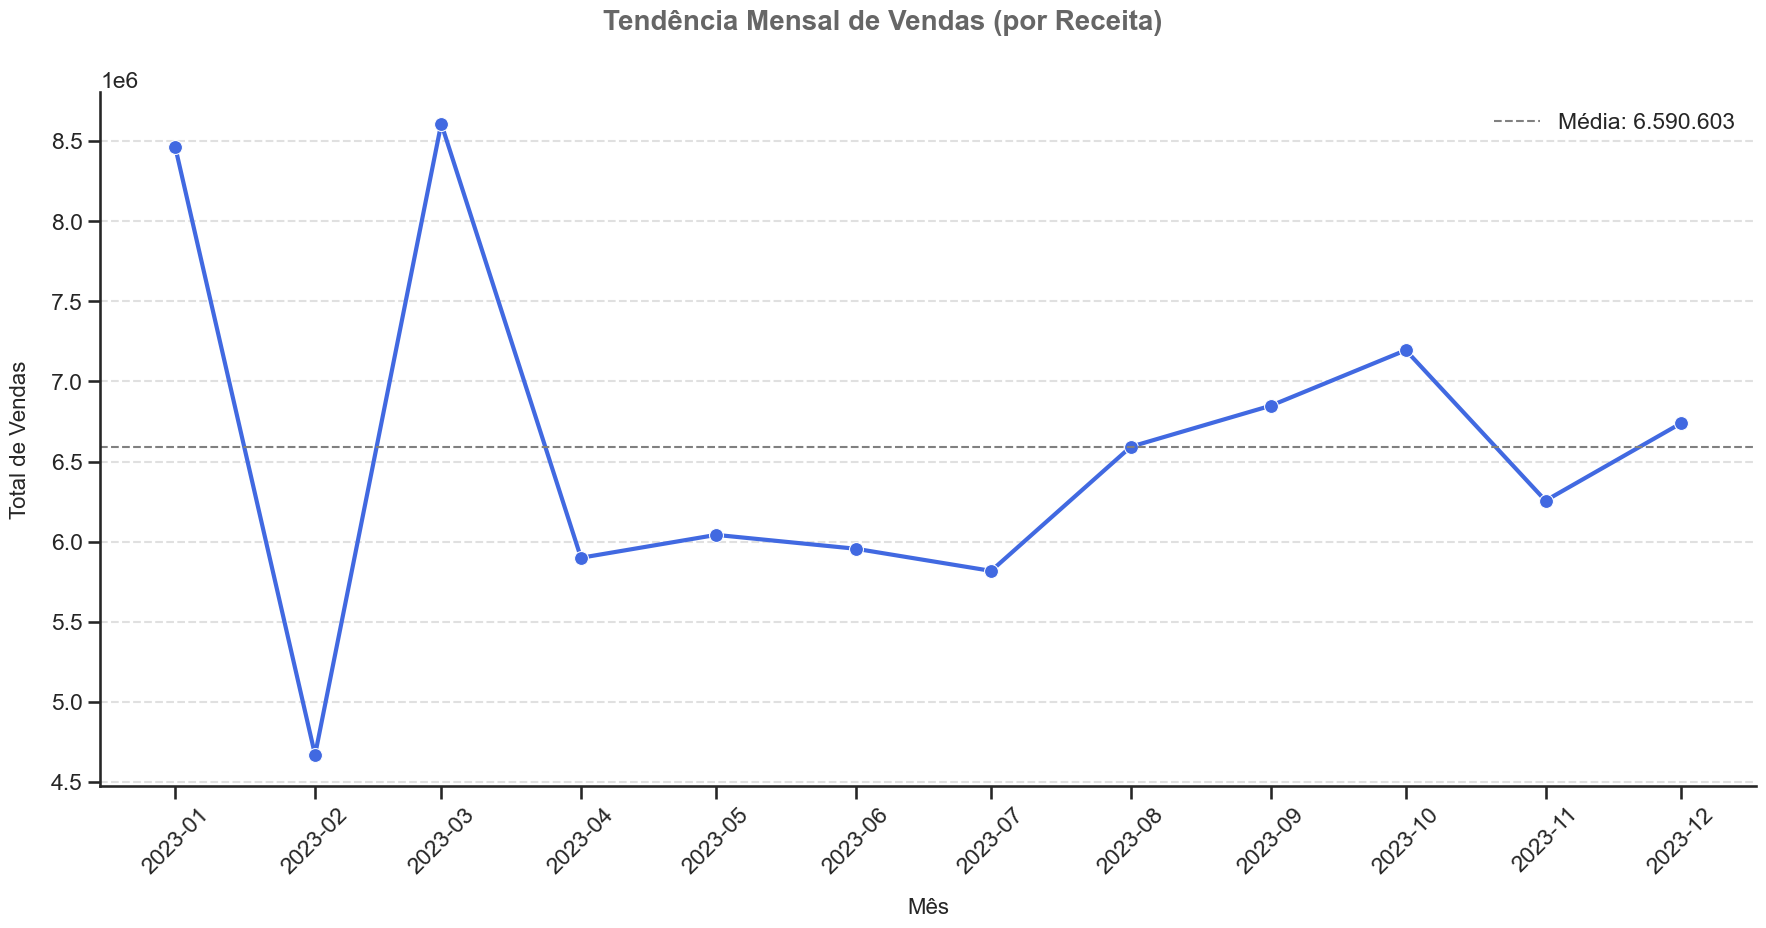

In [7]:
# Gráfico de tendência mensal por receita
# Inseri a linha de média para termos uma referência

df["mes"] = df["data"].dt.to_period("M")

vendas_mensais_mes_receita = (
    df.groupby("mes")["total_vendas"]
    .sum()
    .reset_index()
)

vendas_mensais_mes_receita["mes"] = vendas_mensais_mes_receita["mes"].dt.to_timestamp()

sns.set_theme(style="ticks", context="talk", palette="pastel")

plt.figure(figsize=(18, 9))
ax =sns.lineplot(
    data=vendas_mensais_mes_receita,
    x="mes",
    y="total_vendas",
    marker="o",
    color="royalblue",
    markersize=10,
    linewidth=3,
    
)

media_vendas = vendas_mensais_mes_receita['total_vendas'].mean()
plt.axhline(
    media_vendas,
    color='gray',
    linestyle='--',
    linewidth=1.5,
    label=f'Média: {media_vendas:,.0f}'.replace(',', '.')
)

plt.legend(frameon=False, loc='upper right')
plt.suptitle("Tendência Mensal de Vendas (por Receita)", fontsize=20, weight='bold', color='#666666')
plt.xlabel("Mês", fontsize=16, labelpad=15)
plt.ylabel("Total de Vendas", fontsize=16, labelpad=15)
sns.despine()
plt.tight_layout()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))

plt.show()

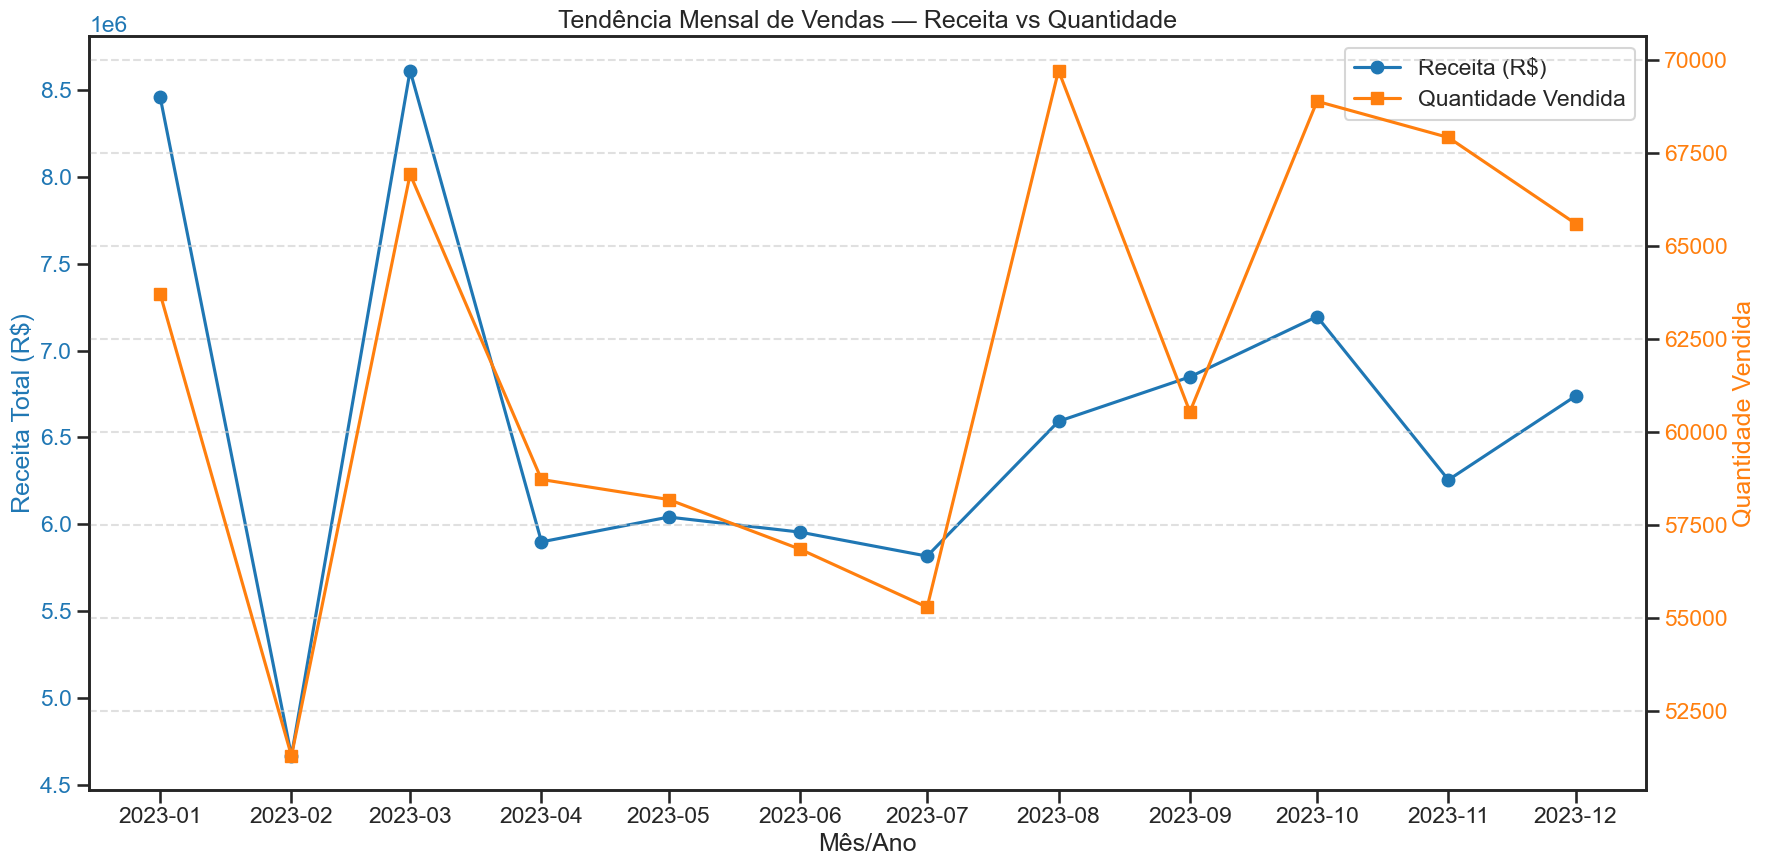

In [11]:
# Gráfico de linhas com as tendências mensais (quantidade e receita)

fig, ax1 = plt.subplots(figsize=(18, 9))

ax1.plot(vendas_mensais_mes_receita["mes"], 
         vendas_mensais_mes_receita["total_vendas"], 
         color="tab:blue", marker="o", label="Receita (R$)")
ax1.set_xlabel("Mês/Ano")
ax1.set_ylabel("Receita Total (R$)", color="tab:blue")
ax1.tick_params(axis="y", labelcolor="tab:blue")

ax2 = ax1.twinx()
ax2.plot(vendas_mensais_mes_qtd["mes"], 
         vendas_mensais_mes_qtd["quantidade"], 
         color="tab:orange", marker="s", label="Quantidade Vendida")
ax2.set_ylabel("Quantidade Vendida", color="tab:orange")
ax2.tick_params(axis="y", labelcolor="tab:orange")

plt.title("Tendência Mensal de Vendas — Receita vs Quantidade")
fig.tight_layout()
plt.grid(True, linestyle="--", alpha=0.6)

lns = ax1.get_lines() + ax2.get_lines()
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="upper right")

ax1.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.show()

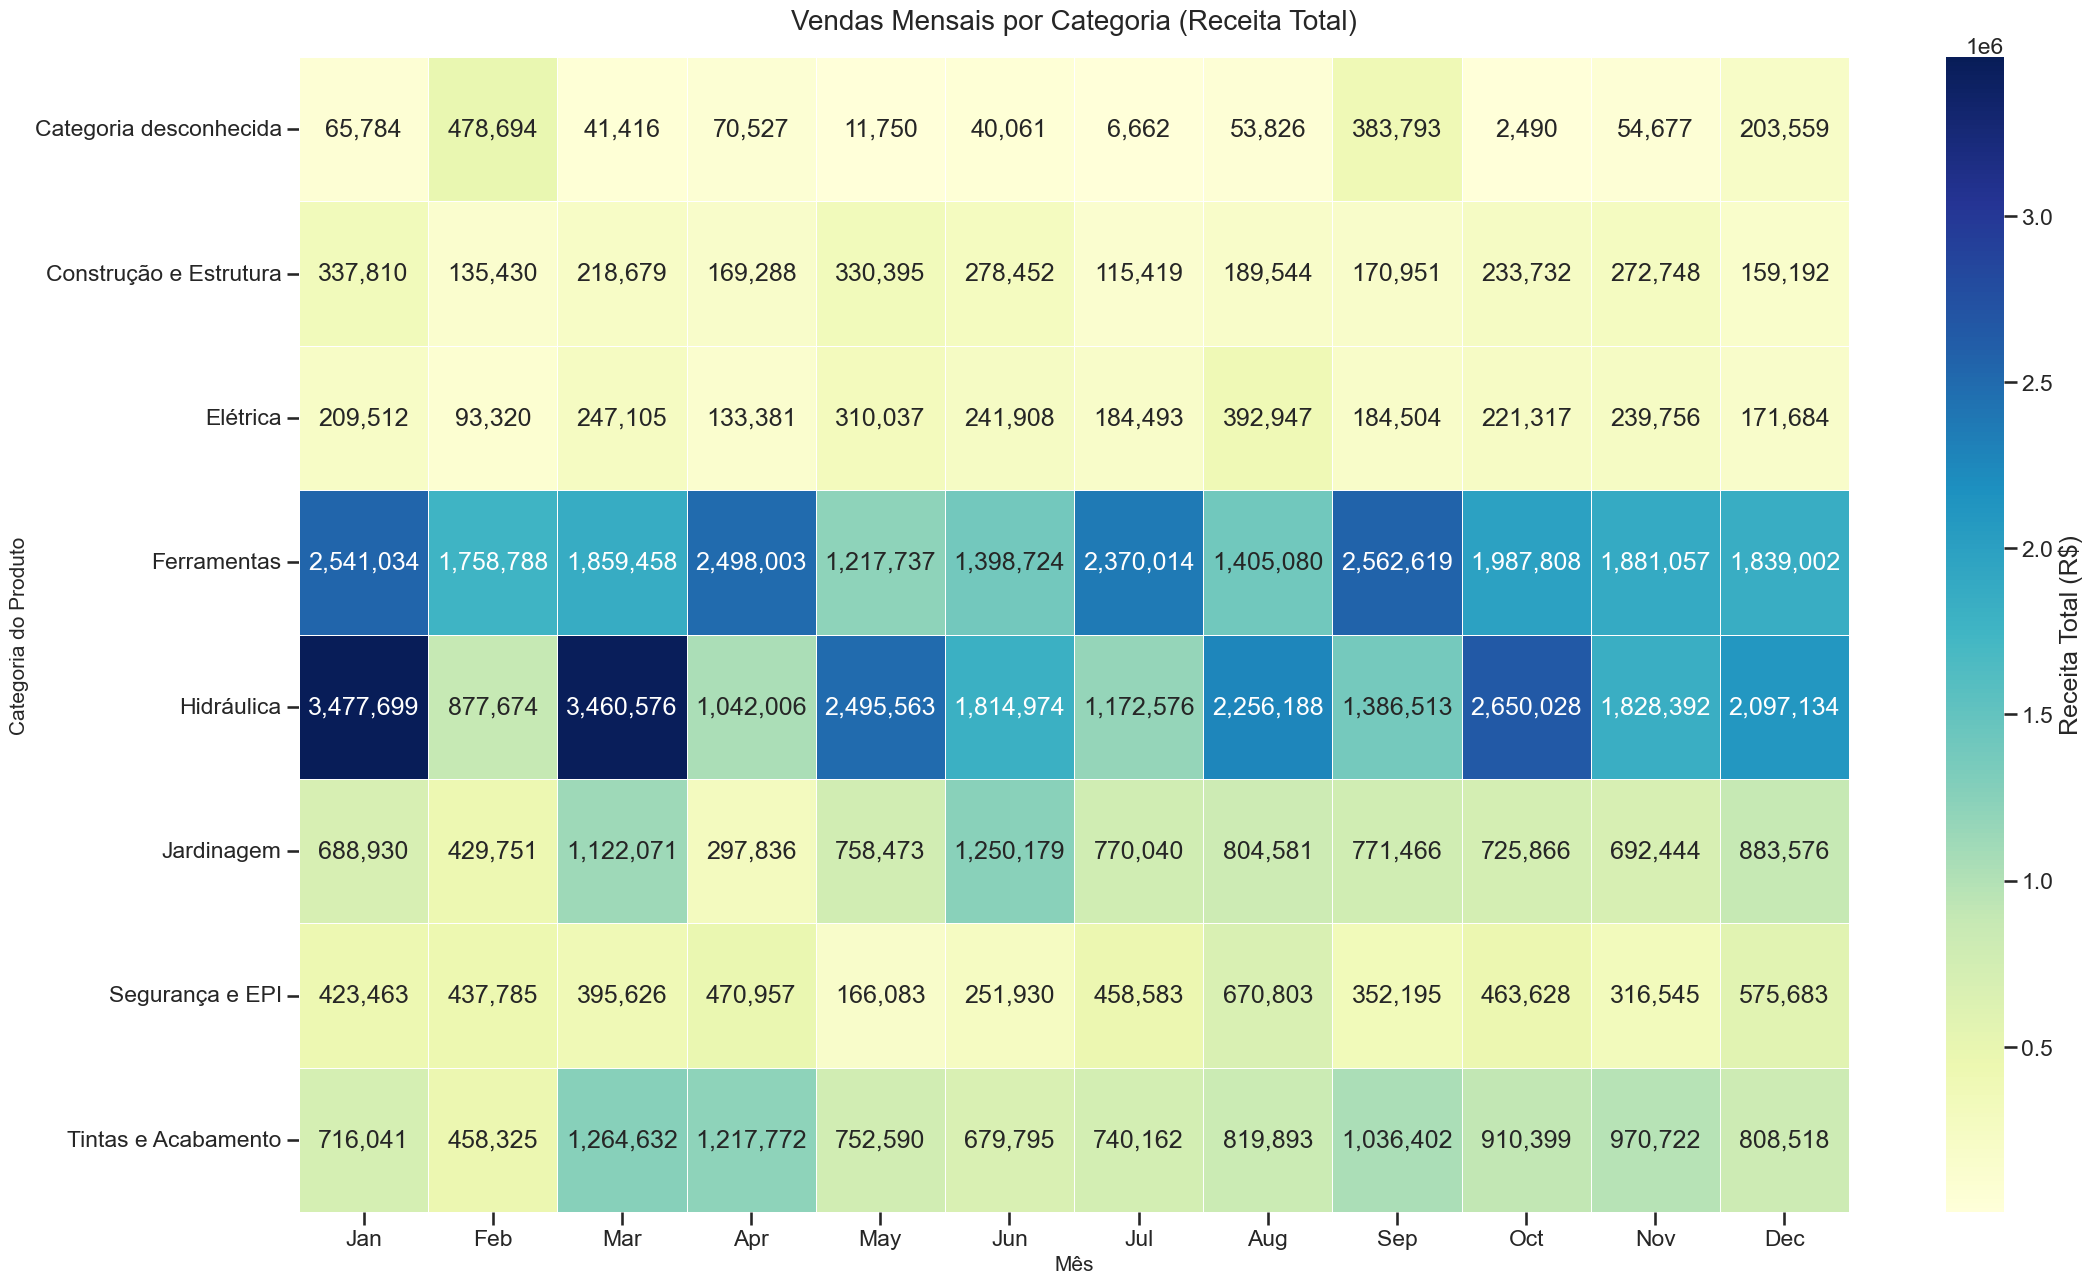

In [9]:
# Gráfico de mapa de calor para verificar a as vendas mensais por categoria

df['mes'] = df['data'].dt.month
df['nome_mes'] = df['data'].dt.strftime('%b') 

ordem_meses = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

heatmap_data = df.groupby(['nome_mes', 'categoria'])['total_vendas'].sum().reset_index()

heatmap_matrix = heatmap_data.pivot_table(
    index='categoria',
    columns='nome_mes',
    values='total_vendas',
    fill_value=0 
)

heatmap_matrix = heatmap_matrix.reindex(columns=ordem_meses, fill_value=0)

plt.figure(figsize=(25, 15))
sns.heatmap(
    heatmap_matrix,
    annot=True,
    fmt=",.0f",
    cmap="YlGnBu",
    linewidths=.5,
    cbar_kws={'label': 'Receita Total (R$)'}
)

plt.title('Vendas Mensais por Categoria (Receita Total)', fontsize=20, pad=20)
plt.xlabel('Mês', fontsize=15)
plt.ylabel('Categoria do Produto', fontsize=15)

plt.show()